In [75]:
# import dependencies
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
from config import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [76]:
# set up twitter authentications
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

# Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [77]:
# initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

In [78]:
# identify target twitter accounts
targets = ['SamHarrisOrg', 'realDonaldTrump', 'TheRickWilson', 'jordanbpeterson', 'RealCandaceO']

In [79]:
# set up lists to hold the data from api calls and sentiment analysis
twitter_feed = []
source_account = []
text = []
date = []
compound = []
positive = []
neutral = []
negative = []

In [80]:
#test = api.user_timeline(target, count=1, result_type="recent")
#name = test[0]["user"]["name"]
#print(json.dumps(test, sort_keys=True, indent=4))
#print(name)

In [81]:
# create loop to make api call and analyze the sentiment
for target in targets:
    
    #get the tweets from api call
    tweets = api.user_timeline(target, count=100, result_type="recent")
    
    # start the loop to collect and sort the data
    for tweet in tweets:
        twitter_feed.append(target)
        source_account.append(tweet["user"]["name"])
        text.append(tweet["text"])
        date.append(tweet["created_at"])

In [82]:
# loop through the text of the tweets to analyze the sentiments
for data in text:
    
    # run the sentiment analysis on each tweet
    sentiment = analyzer.polarity_scores(data)
    
    # Add each value to the appropriate array
    positive.append(sentiment["pos"])
    negative.append(sentiment["neg"])
    neutral.append(sentiment["neu"])
    compound.append(sentiment["compound"])

In [89]:
# set up pandas dataframe
df = pd.DataFrame({
    "Twitter Feed": twitter_feed,
    "Source Account": source_account,
    "Tweet": text,
    "Tweet Date": date,
    "Compound Score": compound,
    "Positive Score": positive,
    "Neutral Score": neutral,
    "Negative Score": negative
})

# light data cleanup for a presentable dataframe
df = df[[ "Twitter Feed","Source Account","Tweet","Tweet Date","Compound Score","Positive Score","Neutral Score","Negative Score" ]]

df

,Twitter Feed,Source Account,Tweet,Tweet Date,Compound Score,Positive Score,Neutral Score,Negative Score
0,SamHarrisOrg,Sam Harris,RT @at_RIN: Have you ever seen a sea like this...,Mon Jun 11 14:58:08 +0000 2018,0.6249,0.221,0.779,0.000
1,SamHarrisOrg,Sam Harris,"This is great, from @mashagessen: ""How George ...",Mon Jun 11 03:56:43 +0000 2018,0.6597,0.293,0.707,0.000
2,SamHarrisOrg,Sam Harris,RT @GenMhayden: This is madness https://t.co/i...,Mon Jun 11 00:06:50 +0000 2018,-0.4404,0.000,0.633,0.367
3,SamHarrisOrg,Sam Harris,RT @MaajidNawaz: I spoke out against the anti-...,Sun Jun 10 23:58:57 +0000 2018,-0.3182,0.141,0.664,0.195
4,SamHarrisOrg,Sam Harris,"Mark Zuckerberg, Elon Musk and the Feud Over K...",Sun Jun 10 20:21:22 +0000 2018,-0.7717,0.000,0.573,0.427
5,SamHarrisOrg,Sam Harris,RT @MaajidNawaz: I’m on my way to speak out ag...,Sun Jun 10 20:08:04 +0000 2018,-0.3182,0.130,0.690,0.180
6,SamHarrisOrg,Sam Harris,Watching @Deeyah_Khan pacify the belligerence ...,Sun Jun 10 20:01:37 +0000 2018,0.3612,0.163,0.744,0.093
7,SamHarrisOrg,Sam Harris,RT @David_Yarrow: Black Panther broke many rec...,Sun Jun 10 19:57:00 +0000 2018,-0.4215,0.000,0.891,0.109
8,SamHarrisOrg,Sam Harris,RT @TheAtlantic: “He’s like Heath Ledger’s Jok...,Sun Jun 10 16:07:08 +0000 2018,0.3612,0.116,0.884,0.000
9,SamHarrisOrg,Sam Harris,"RT @DavidDeutschOxf: By the way, Marxism, post...",Sat Jun 09 19:15:32 +0000 2018,0.0000,0.000,1.000,0.000


In [84]:
# save pandas dataframe to a csv file

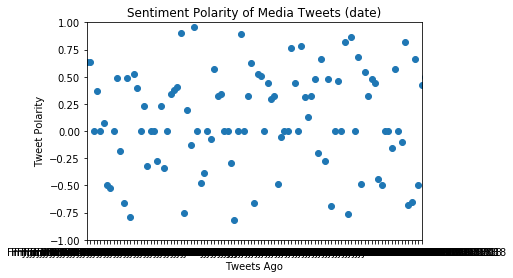

In [88]:
# plot the tweet sentiment analysis
plt.scatter(df["Tweet Date"], df["Compound Score"])
plt.title("Sentiment Polarity of Media Tweets (date)")
plt.xlim(0, 100)
plt.ylim(-1.0, 1.0)
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.show()